# Linear Regression

Estimated time needed: **15** minutes

## Objectives

After completing this lab you will be able to:

*   Use scikit-learn to implement simple Linear Regression
*   Create a model, train it, test it and use the model

# Initializing Data Visualization Libraries

In [39]:
import matplotlib.pyplot as plt # for basic plotting
import pandas as pd # for data manipulation
import pylab as pl
import numpy as np # for numerical operations
%matplotlib inline # ensures that the plots are displayed directly within the Jupyter Notebook environment.
import seaborn as sns #  for statistical data visualization.

# Installing Kaggle Package

In [2]:
!pip install -q kaggle

In [3]:
# upload json file into colab
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"safianaif","key":"b2f71a473fd06a510cf64bb9b8e8a9b9"}'}

In [6]:
 #Make a directory named “.kaggle”
!mkdir ~/.kaggle
 #Copy the “kaggle.json” into this new directory
 ! cp kaggle.json ~/.kaggle/
  #Allocate the required permission for this file.
 ! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [7]:
#Download the dataset
! kaggle datasets download -d shree1992/housedata

  0% 0.00/432k [00:00<?, ?B/s]
100% 432k/432k [00:00<00:00, 146MB/s]


In [9]:
# unzip the dataset
!unzip housedata.zip

Archive:  housedata.zip
  inflating: data.csv                
  inflating: data.dat                
  inflating: output.csv              


After running this code, you should now have the dataset (housedata.zip) in your Colab/Vscode environment.

Don't worry if you cant wrap your head around it! its still too early, so for now, you can copy & paste this code if needed.

The next steps would be to load the dataset into a Pandas DataFrame and start exploring the data:

# Understanding the data

In [16]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('/content/data.csv')  

# Display the first few rows of the DataFrame
print(df.head(2))

                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0        1.5         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0        2.5         3650      9050   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   

   yr_renovated                street       city  statezip country  
0          2005  18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0       709 W Blaine St    Seattle  WA 98119     USA  


# Data Exploration

In [18]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


We know our target variable is 'price'.
Lets explore the variables to find which one positively correlates more to it!

As you can see, there are a lot of variables and we might not need all of them.

Lets select some features to explore more and eleminate whats not needed.

In [23]:
# Select some features
abc = df[['bedrooms','bathrooms' ,'view' , 'floors', 'price' ]]
abc

,bedrooms,bathrooms,view,floors,price
0,3.0,1.50,0,1.5,3.130000e+05
1,5.0,2.50,4,2.0,2.384000e+06
2,3.0,2.00,0,1.0,3.420000e+05
3,3.0,2.25,0,1.0,4.200000e+05
4,4.0,2.50,0,1.0,5.500000e+05
...,...,...,...,...,...
4595,3.0,1.75,0,1.0,3.081667e+05
4596,3.0,2.50,0,2.0,5.343333e+05
4597,3.0,2.50,0,2.0,4.169042e+05
4598,4.0,2.00,0,1.0,2.034000e+05


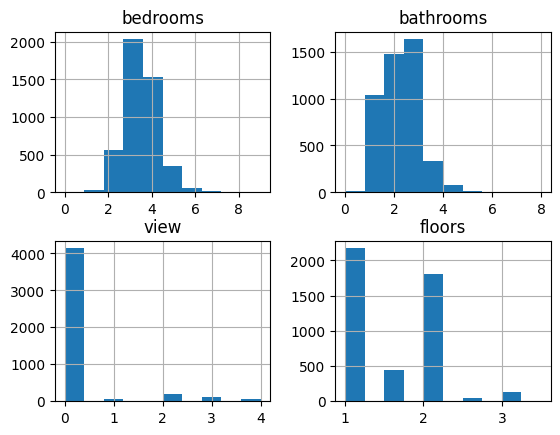

In [22]:
# We can plot them to understand more
abc.hist()
plt.show()

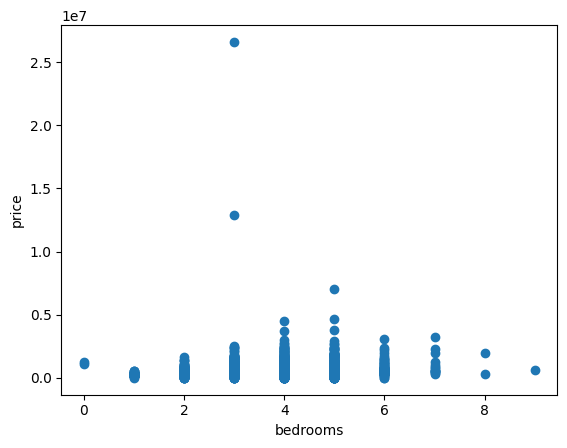

In [25]:
# Now lets plot each of these features against our target variable 'price' to see how linear their relationship is
plt.scatter(abc.bedrooms, abc.price) # by default, its x then y
plt.xlabel("bedrooms")
plt.ylabel("price")
plt.show()

As shown above, there is barely any linearity between them.
So we can safely remove bedrooms from our set of features.

Lets do the same to the others!

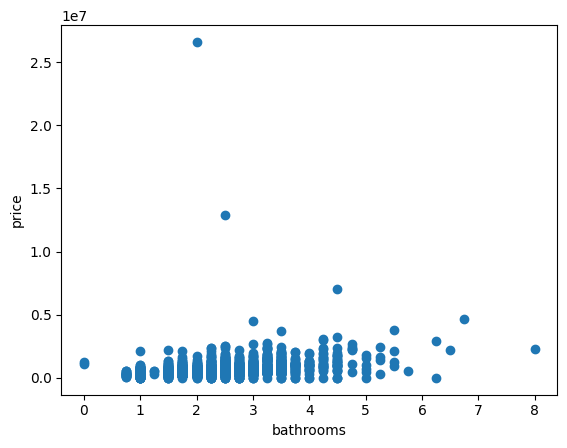

In [26]:

plt.scatter(abc.bathrooms, abc.price) # by default, its x then y
plt.xlabel("bathrooms")
plt.ylabel("price")
plt.show()

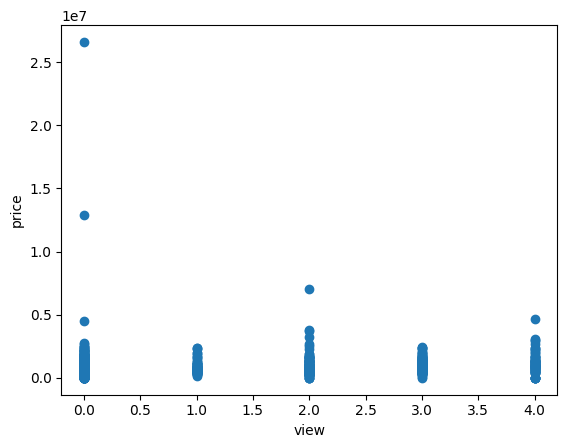

In [28]:
plt.scatter(abc.view, abc.price) 
plt.xlabel("view")
plt.ylabel("price")
plt.show()

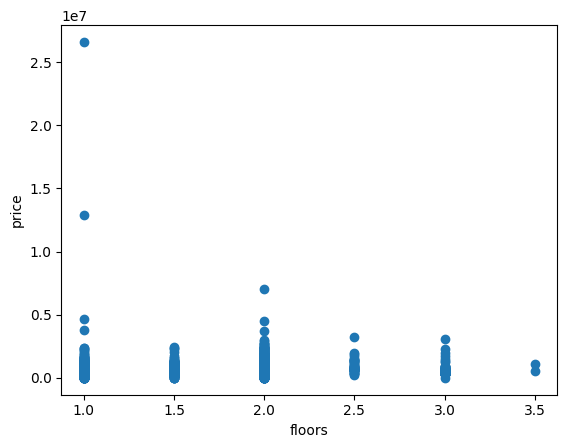

In [29]:
plt.scatter(abc.floors, abc.price) 
plt.xlabel("floors")
plt.ylabel("price")
plt.show()

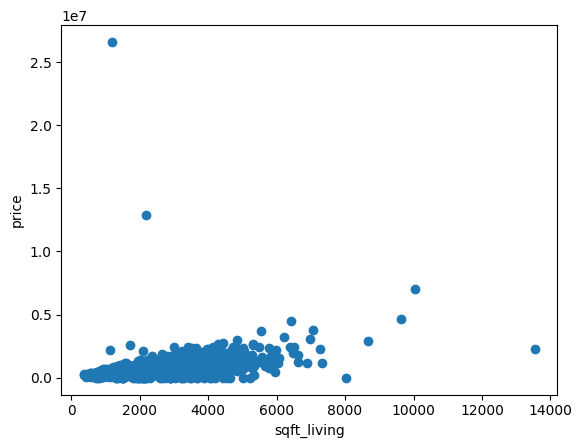

In [30]:
plt.scatter(df.sqft_living, abc.price) 
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.show()

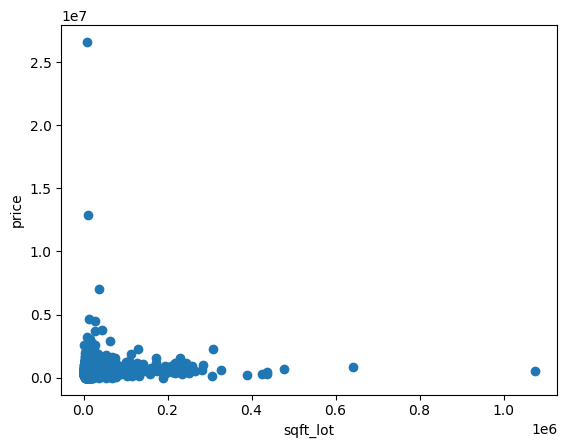

In [31]:
plt.scatter(df.sqft_lot, abc.price)
plt.xlabel("sqft_lot")
plt.ylabel("price")
plt.show()

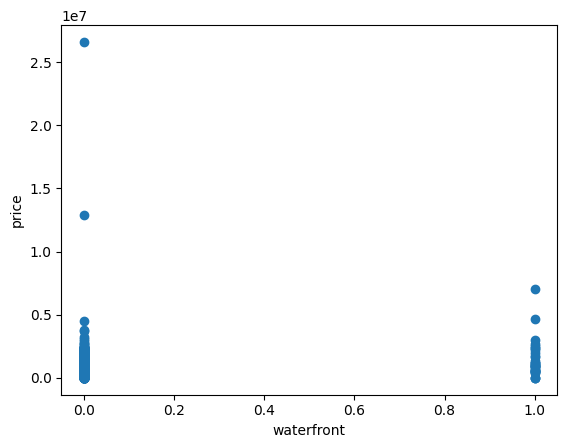

In [32]:
plt.scatter(df.waterfront, abc.price) 
plt.xlabel("waterfront")
plt.ylabel("price")
plt.show()

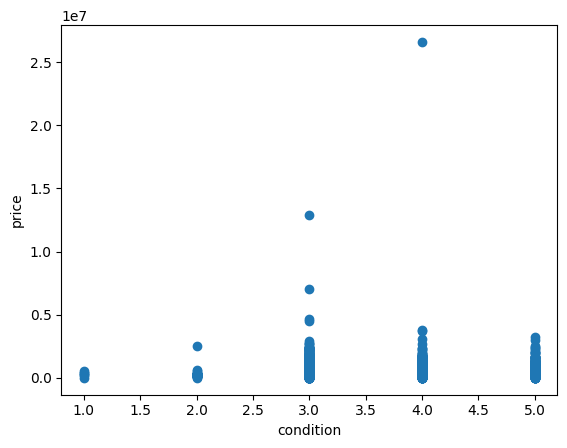

In [33]:
plt.scatter(df.condition, abc.price) 
plt.xlabel("condition")
plt.ylabel("price")
plt.show()

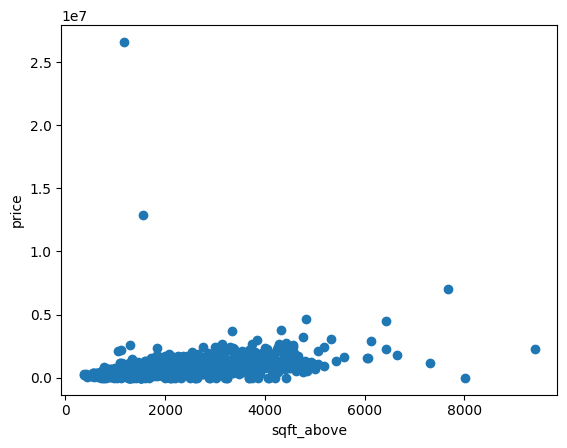

In [34]:
plt.scatter(df.sqft_above, abc.price) 
plt.xlabel("sqft_above")
plt.ylabel("price")
plt.show()

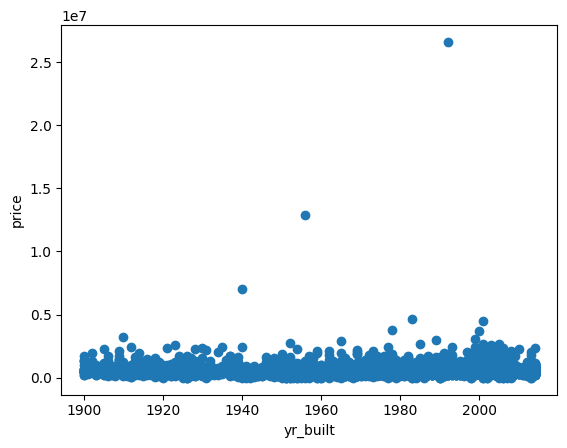

In [36]:
plt.scatter(df.yr_built, abc.price) 
plt.xlabel("yr_built")
plt.ylabel("price")
plt.show()

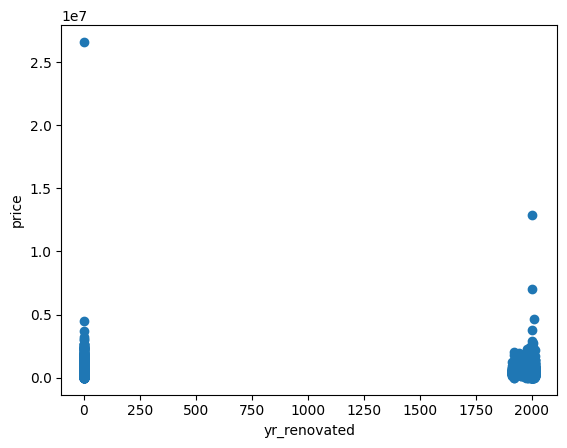

In [37]:
plt.scatter(df.yr_renovated, abc.price) 
plt.xlabel("yr_renovated")
plt.ylabel("price")
plt.show()

# Correlation does NOT imply Causation

As you may have noticed, the step before was a bit repetitive and cumbersome, we can use this feature that will instantly calculate the correlation coefficients between all features and the target variable!

But remember, correlation does NOT mean causation and other factors might influence the relationship

In [38]:
correlation_matrix = df.corr()
print(correlation_matrix['price'].sort_values(ascending=False))
# Prints the correlation coefficients of each feature with respect to the 'price' column.
# It helps identify which features are most positively or negatively correlated with the target variable 'price'.

price            1.000000
sqft_living      0.430410
sqft_above       0.367570
bathrooms        0.327110
view             0.228504
sqft_basement    0.210427
bedrooms         0.200336
floors           0.151461
waterfront       0.135648
sqft_lot         0.050451
condition        0.034915
yr_built         0.021857
yr_renovated    -0.028774
Name: price, dtype: float64


<ipython-input-38-55aa480e6a40>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Here are some observations based on our correlation results:

Strong Positive Correlation:

'sqft_living' has a moderate positive correlation with 'price' (0.430410).
'sqft_above' and 'bathrooms' also show positive correlations, but they are slightly lower.


Lets explore with different feature combinations!
A simple way to do this is by plotting a heatmap:

<ipython-input-42-2744017f12db>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True )


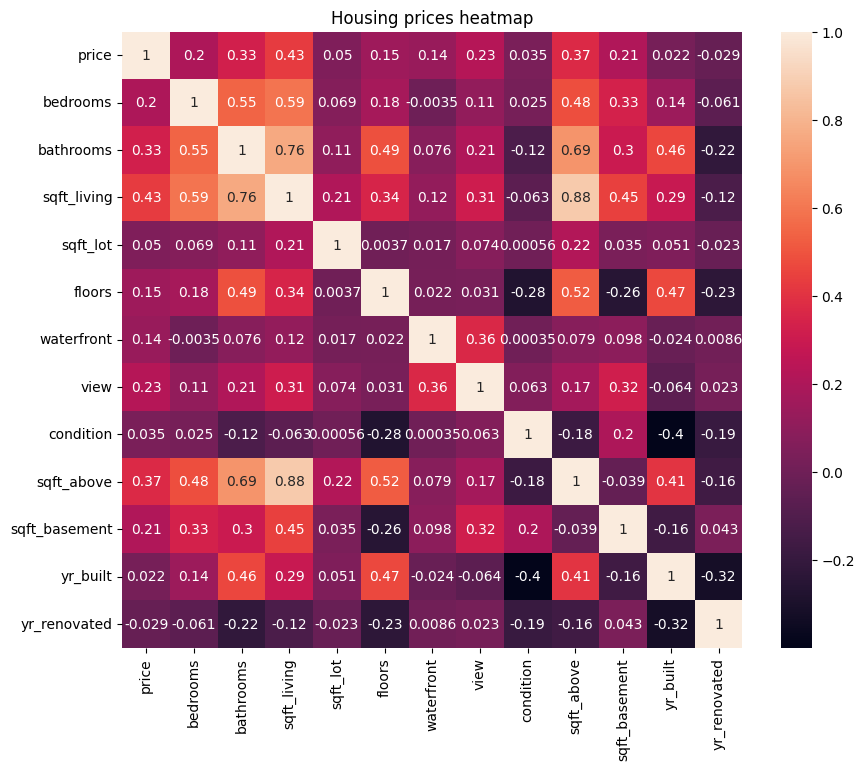

In [42]:
# we will plot the heatmap with the help of the correlation results we calculated earlier
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True )
plt.title("Housing prices heatmap")
plt.show()

We can notice strong combinations!
bedrooms and sqft_living of 0.59

(This is somewhat expected, as larger houses may have more bedrooms.)

bedrooms and sqft_lot of 0.69

batrooms and sqft_living of 0.76

(This is intuitive, as larger houses may tend to have more bathrooms.)

sqft_living and sqft_above with 0.88

batrooms and sqft_above of 0.69

This indicates that larger houses (with more square footage above ground) tend to have more bathrooms.

# Splitting the data

In [46]:
x = df[['bedrooms','bathrooms','sqft_living','sqft_lot']]
y = df['price']

from sklearn.model_selection import train_test_split
from sklearn import metrics
import pickle

X_train, X_test,Y_train, Y_test = train_test_split(x, y, test_size=0.33, random_state=23)

# Model Training

In [49]:
# Now lets import the linear regression!
from sklearn.linear_model import LinearRegression

# Lets save the model into a variable:
lr = LinearRegression()

# Fitting the model
lr.fit(X_train,Y_train)
# The purpose of this is to find the m & c for the 'best_fit' line. Which we just did! yay!
# This means that the training is done, we can go ahead and start predicting!

LinearRegression()

In [54]:
# Before we start predicting, lets look at the actual values of m & c that our model found.
# NOTE: in mathematics, m is the slope of the line, in machine learning, its called the coefficient. keep that in mind and dont get it confused!
m = lr.coef_
m

array([-5.37382474e+04,  1.79051502e+04,  2.65664170e+02, -7.23641880e-01])

In [55]:
c = lr.intercept_
c

137303.8990643082

# Make Predictions

Calling the `predict` function generates predictions.

In [57]:
predictions = lr.predict(X_test)
predictions

array([477275.55052507, 444102.133703  , 381653.49502304, ...,
       805796.64834155, 433343.24301093, 564936.9217662 ])

# Evaluating our results
Note:
X_test would contain the feature values for houses in your testing set (e.g., the number of bedrooms, bathrooms, square footage).
y_test would contain the actual house prices for those houses.
After training your machine learning model on the training set (X_train, y_train), you use X_test to make predictions, and then you compare those predictions with the true values in y_test to evaluate how well your model generalizes to new, unseen data

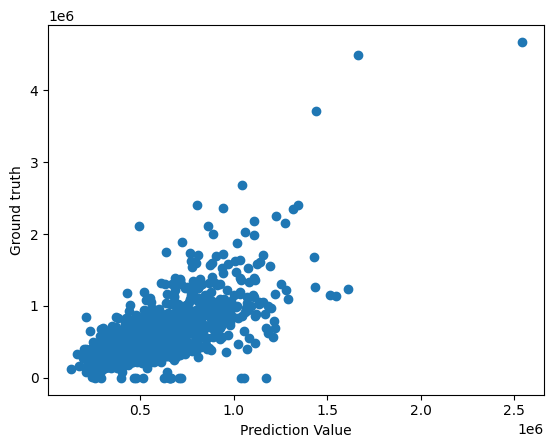

In [62]:
plt.scatter(predictions, Y_test)
plt.ylabel('Ground truth')
plt.xlabel('Prediction Value')
plt.show()

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
rmse = mean_squared_error(Y_test, predictions, squared=False)
r2 = r2_score(Y_test, predictions)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

# These metrics provide insights into the accuracy and goodness of fit of the regression model.

Mean Absolute Error (MAE): 174381.15387643338
Mean Squared Error (MSE): 73048571655.3747
Root Mean Squared Error (RMSE): 270274.9926563216
R-squared (R2): 0.4781762847885851


# Summary

In summary, we set up data visualization libraries, explored feature correlations with the target variable, visualized correlations using a heatmap, and evaluated the performance of a regression model using various metrics. After more training, you will learn how to make this model even better and exactly how to reduce its error percentages.